모멘트 방법으로 추정한 모수는 그 숫자가 가장 가능성 높은 값이라는 이론적 보장이 없다. 이 절에서는 이론적으로 가장 가능성이 높은 모수를 찾는 방법인 최대가능도 추정법에 대해 알아본다. 최대가능도 추정법은 모든 추정방법 중 가장 널리 사용되는 방법이다. 먼저 가능도함수에 대해 알아보고 베르누이분포, 카테고리분포, 정규분포, 다변수정규분포 등 여러 기본분포의 모수를 최대가능도 추정법으로 추정하는 방법을 알아본다.

# 가능도함수

이제부터는 여러가지 확률분포 X에 대한 확률밀도함수 또는 확률질량함수를 다음과 같이 대표하여 쓰기로 한다.

$$p(x;θ)$$

이 식에서 x는 확률분포가 가질 수 있는 실숫값이다. x는 스칼라값일 수도 있고 벡터값일 수도 있다. θ는 확률밀도함수의 모수를 표시하는 대표기호다. x와 마찬가지로 θ도 스칼라일 수도 있고 벡터일 수도 있다.

만약 확률분포가 베르누이 확률분포라면,

$$θ=μ$$

만약 확률분포가 이항분포면,

$$θ=(N,μ)$$

확률분포가 정규분포라면

$$θ=(μ,σ^2)$$

확률밀도함수에서는 모수 θ가 이미 알고 있는 상수계수고 x가 변수다. 하지만 모수 추정 문제에서는 x 즉, 이미 실현된 표본값은 알고 있지만 모수 θ를 모르고 있다. 이때는 반대로 x를 이미 알고있는 상수계수로 놓고 θ를 변수로 생각한다. 물론 함수의 값 자체는 변함없이 주어진 x가 나올 수 있는 확률밀도다. 

 이렇게 **확률밀도함수에서 모수를 변수로 보는 경우에 이 함수를 가능도함수(likelihood function)**라고 한다. 같은 함수를 확률밀도함수로 보면 p(x;θ)로 표기하지만 가능도함수로 보면 L(θ;x) 기호로 표기한다.

$$L(θ;x)=p(x;θ)$$

정규분포의 확률밀도함수는 다음과 같은 단변수 함수다.

$$p(x;u_0,σ_0^2)={1 \over {\sqrt{2πσ_0^2}}}exp{-(x-u_0)^2\over {2σ_0^2}}$$

이때 가능도함수는 다음과 같이 입력변수가 2개인 다변수 함수가 된다.

$$L(u;σ_0^2;x_0)={1 \over {\sqrt{2πσ^2}}}exp{-(x_0-u)^2\over {2σ^2}}$$

수식은 같지만 함수의 변수가 다르다는 점에 주의해야한다.

예를 들어 정규분포에서 기댓값 모수와 분산 모수를 입력 변수로 가지는 가능도함수를 그리면 각각 다음과 같다. 기댓값 모수를 입력 변수로 가지는 가능도함수의 모양이 확률밀도함수와 같은 모양인 것은 (x와 μ를 바꾸어도 식이 같아지는) 정규분포의 확률밀도함수가 가지는 특별한 성질 때문이며 아주 우연히 이렇게 된 것뿐이다.

In [1]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

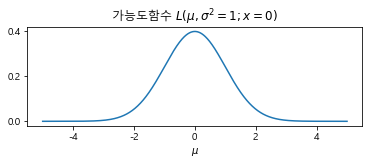

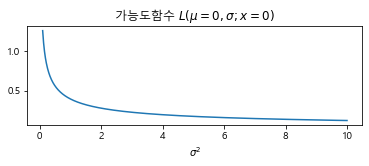

In [2]:
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)
plt.plot(mus, likelihood_mu)
plt.title("가능도함수 $L(\mu, \sigma^2=1; x=0)$")
plt.xlabel("$\mu$")
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.title("가능도함수 $L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$")
plt.show()

$L(μ,σ^2)$은 이차원 함수이므로 입체로 그리면 다음과 같다.

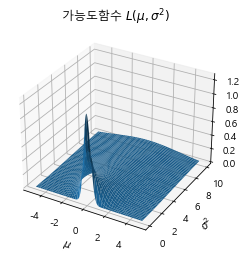

In [3]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('가능도함수 $L(\mu, \sigma^2)$')
plt.show()

가능도함수를 수식으로 나타내면 수식 자체는 확률밀도함수의 수식과 같다. 하지만 가능도함수는 확률분포함수가 아니라는 점에 주의해야 한다. 확률밀도함수는 가능한 모든 표본값 x에 대해 적분하면 전체 면적이 1이 되지만,

$$\int_{-\infty}^\infty p(x;θ)dx=1$$

가능도함수는 가능한 모든 모숫값 θ에 대해 적분했을 때 1이 된다는 보장이 없다.

$$\int_{-\infty}^\infty L(x;θ)dθ = \int_{-\infty}^\infty p(x;θ)dθ\neq 1$$

확률밀도함수 f(x;θ)

$\bullet$ θ 값을 이미 알고 있음

$\bullet$ θ 는 상수, x는 변수

$\bullet$ θ가 이미 정해져 있는 상황에서의 x 값의 상대적 확률

$\bullet$ 적분하면 전체 면적은 항상 1

가능도함수 L(θ)=p(x|θ)

$\bullet$ x 가 이미 발생. 값을 이미 알고 있음

$\bullet$ x 는 상수, θ는 변수

$\bullet$ x가 이미 정해져 있는 상황에서의 θ 값의 상대적 확률

$\bullet$ 적분하면 전체 면적이 1이 아닐 수 있다.

# 최대가능도 추정법

최대가능도 추정법(Maximum Likelihood Estimation, MLE)은 주어진 표본에 대해 가능도를 가장 크게 하는 모수 θ를 찾는 방법이다. 이 방법으로 찾은 모수는 기호로 $\hatθ_{MLE}$와 같이 표시한다.

$$ \hatθ_{MLE}=arg max_θL(θ;x)$$

정규분포를 가지는 확률변수의 분산 $σ^2$=1은 알고 있으나 평균 μ를 모르고 있어 이를 추정해야 하는 문제를 생각해보자. 확률변수의 표본은 하나 x1=1를 가지고 있다고 하자. 이 경우 어떤 μ 값이 가장 가능성(가능도)이 커 보이는가? 다음 그림에는 μ=−1, μ=0, μ=1, 세 가지 후보를 제시한다. 이 세 가지 μ 값에 대해 1이 나올 확률밀도의 값이 바로 가능도다.

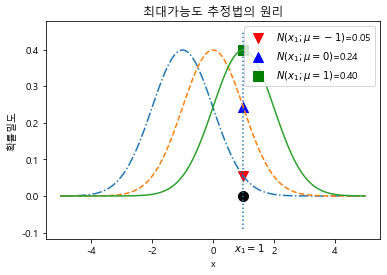

In [4]:
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v', 
         label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^', 
         label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s', 
         label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("최대가능도 추정법의 원리")
plt.show()

$\bullet$N(x;μ=−1) 이라는 확률분포에서 x=1이 나올 가능도(확률밀도)는 0.05이다.

$\bullet$N(x;μ=0) 이라는 확률분포에서 x=1이 나올 가능도(확률밀도)는 0.24이다.

$\bullet$N(x;μ=1) 이라는 확률분포에서 x=1이 나올 가능도(확률밀도)는 0.40이다.

어떤 확률분포를 고르는 것이 합리적인가? 당연히 가장 큰 가능도를 가진 확률분포를 선택해야 한다. 그림에서 볼 수 있듯이 μ=1일 경우의 가능도가 가장 크다. 따라서 최대가능도 추정법에 의한 추정값은 $\hat μ_{MLE}$=1이다.

# 복수의 표본 데이터가 있는 경우의 가능도함수

일반적으로는 추정을 위해 확보하고 있는 확률변수 표본의 수가 하나가 아니라 복수 개 ${x_1,x_2,⋯x_N}$이므로 가능도함수도 복수 표본값에 대한 결합확률밀도$ pX_1X_2⋯X_N(x_1,x_2,⋯,x_N;θ)$가 된다. 표본 데이터 $x_1,x_2,⋯x_N$는 같은 확률분포에서 나온 독립적인 값들이므로 결합 확률밀도함수는 다음처럼 곱으로 표현된다.

$$L(θ;x_1,....,x_N)=p(x_1,....,x_N;θ)=\prod_{i=1}^n p(x_i;θ)$$

정규분포로부터 다음 세 개의 표본 데이터를 얻었다.

{1,0,−3}

이 경우의 가능도함수는 다음과 같다.

$$L(θ;x1,x2,x3)$$

$$=N(x1,x2,x3;θ)$$

$$=N(x1;θ)⋅N(x2;θ)⋅N(x3;θ)$$

$$={1 \over \sqrt{2πσ^2}}exp\left(-\frac{(1-u)^2}{2σ^2}\right)\cdot{1 \over \sqrt{2πσ^2}}exp\left(-\frac{(0-u)^2}{2σ^2}\right)\cdot{1 \over \sqrt{2πσ^2}}exp\left(-\frac{(-3-u)^2}{2σ^2}\right)$$

$$={1 \over {(2πσ^2)^{2 \over 3}}}exp\left(-\frac{u^2+(1-u)^2+(-3-u)^2}{2σ^2}\right)$$

$$={1 \over {(2πσ^2)^{2 \over 3}}}exp\left(-\frac{3u^2+4u+10}{2σ^2}\right)$$

$$={1 \over {(2πσ^2)^{2 \over 3}}}exp\left(-\frac{3(u+{2 \over 3})^2+{3 \over 26}}{2σ^2}\right)$$

이 가능도함수는 2차함수이므로 미분을 하지 않아도 최대값 위치를 구할 수 있다. 가장 가능도를 높게하는 모수 μ의 값은 $\hat μ_{MLE}=−{2 \over 3}$이다.

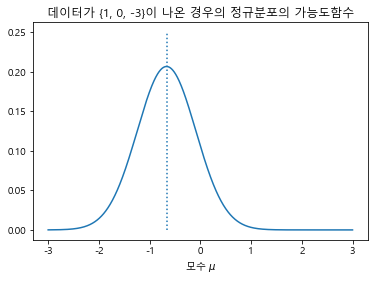

In [5]:
mu = np.linspace(-3, 3, 1000)
sigma2 = 1

def likelihood(mu):
    return (2 * np.pi * sigma2) ** (3 / 2) * np.exp(-(3 * mu ** 2 + 4 * mu + 10) / (2 * sigma2))

li = likelihood(mu)

plt.plot(mu, li)
plt.vlines(-2/3, 0, 0.25, linestyles=":")
plt.xlabel(r"모수 $\mu$")
plt.title("데이터가 {1, 0, -3}이 나온 경우의 정규분포의 가능도함수")
plt.show()

# 로그가능도함수

일반적으로 최대가능도 추정법을 사용하여 가능도가 최대가 되는 θ를 계산해려면 수치적 최적화(numerical optimization)를 해야 한다.

$$\hat θ_{ML}=argmaxθL(θ;{x_i})$$

그런데 보통은 가능도를 직접 사용하는 것이 아니라 로그 변환한 로그가능도함수 $LL=logL$를 사용하는 경우가 많다.

$$\hat θ_{ML}=argmax_θlogL(θ;{x_i})$$

이유는 다음과 같다.

1.로그 변환에 의해서는 최대값의 위치가 변치 않는다.

2.반복시행으로 인한 복수 표본 데이터인 경우 결합 확률밀도함수가 동일한 함수의 곱으로 나타나는 경우가 많은데 이때 로그 변환에 의해 곱셈이 덧셈이 되어 계산이 단순해진다.

위 예와 같이 정규분포로 부터 얻은 표본값이 다음과 같은 경우

{1,0,−3}

로그 변환을 하면 최대값의 위치가 −2/3라는 것을 쉽게 구할 수 있다.

$$logL(u;x_1,x_2,x_3)$$

$$=log\left(({1 \over {(2πσ^2)^{2 \over 3}}}exp\left(-\frac{3u^2+4u+10}{2σ^2}\right)\right)$$

$$=log{1 \over {(2πσ^2)^{2 \over 3}}}-{{3u^2+4u+10}\over {2σ^2}}$$

$$=log{1 \over {(2πσ^2)^{2 \over 3}}}{{-3(u+{2 \over 3})^2+{3 \over 26}}\over{2σ^2}}$$